# Helath study python Hamed 

In [11]:
import sys, os
sys.path.append(os.path.abspath(".."))
# Så python kan gå in i Data mappen

In [12]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("./data/health_study_dataset.csv") # Läser in CSV och sparar i df
df.head()


,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
0,1,57,F,168.9,65.8,141.8,4.58,No,0
1,2,47,M,180.4,95.9,144.8,5.18,Yes,0
2,3,59,F,169.9,82.2,151.7,6.16,No,0
3,4,72,M,157.7,93.1,151.0,6.63,No,0
4,5,46,M,192.6,104.1,144.1,5.21,No,0


# Del 1 grundläggande analys och statistik

In [13]:
print("Medel ålder:",df.age.mean())
print("Median ålder:",df.age.median())
print("Min ålder:",df.age.min())
print("Max ålder:",df.age.max())


Medel ålder: 49.42625
Median ålder: 50.0
Min ålder: 18
Max ålder: 90


In [14]:
print("Medel weight:",df.weight.mean())
print("Median weight:",df.weight.median())
print("Min weight:",df.weight.min())
print("Max weight:",df.weight.max())


Medel weight: 73.413
Median weight: 73.2
Min weight: 33.7
Max weight: 114.4


In [15]:
print("Medel height:",df.height.mean())
print("Median height:",df.height.median())
print("Min height:",df.height.min())
print("Max height:",df.height.max())


Medel height: 171.84925000000004
Median height: 171.35000000000002
Min height: 144.4
Max height: 200.4


In [16]:
print("Medel systolic_bp:",df.systolic_bp.mean())
print("Median systolic_bp:",df.systolic_bp.median())
print("Min systolic_bp:",df.systolic_bp.min())
print("Max systolic_bp:",df.systolic_bp.max())


Medel systolic_bp: 149.178625
Median systolic_bp: 149.4
Min systolic_bp: 106.8
Max systolic_bp: 185.9


In [17]:
print("Medel cholesterol:",df.cholesterol.mean())
print("Median cholesterol:",df.cholesterol.median())
print("Min cholesterol:",df.cholesterol.min())
print("Max cholesterol:",df.cholesterol.max())


Medel cholesterol: 4.92915
Median cholesterol: 4.97
Min cholesterol: 2.5
Max cholesterol: 7.88


# Skapar 3 grafer 

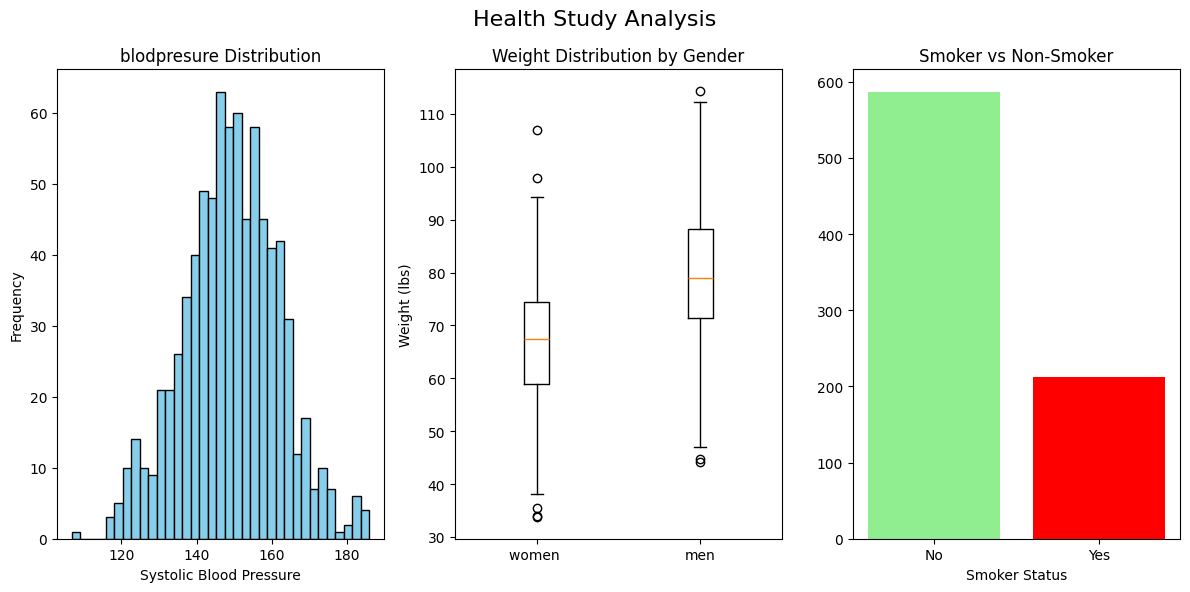

In [18]:
fig ,ax= plt.subplots(1,3,figsize =(12,6))  
ax[0].hist (df.systolic_bp, bins =35, color='skyblue', edgecolor='black')   
ax[0].set_title ('blodpresure Distribution')
ax[0].set_xlabel ('Systolic Blood Pressure')
ax[0].set_ylabel ('Frequency')

#separera könen och tar deras vikter här 
women = df[df["sex"] == "F"]["weight"]
men  = df[df["sex"] == "M"]["weight"]
ax[1].boxplot ([women,men], tick_labels =["women ","men"])
ax[1].set_title ("Weight Distribution by Gender")
ax[1].set_ylabel ("Weight (lbs)")


#kollar på rökare vs icke rökare och räknar deras antal med en bar graph
ax[2].bar(df.smoker.value_counts().index, 
          df.smoker.value_counts().values, color =['lightgreen', 'red'])
ax[2].set_title ("Smoker vs Non-Smoker")
ax[2].set_xlabel ("Smoker Status")

plt.suptitle ("Health Study Analysis", fontsize =16)
plt.tight_layout ()
                     

# Simulering 
Simulering kopplad till caset (använd numpy.random + seed)

Beräkna andelen personer i datasetet som har sjukdomen.

Använd numpy för att simulera 1000 slumpade personer med samma sannolikhet för sjukdom.

Jämför den simulerade andelen med den verkliga andelen i datasetet.


In [19]:

np.random.seed(42)
n=1000

display(len(df[df.disease ==1]))
# jag ser att 47 personer har sjukdomen i datasetet (av 800)

sick_procent = df.disease.mean()
sick_procent
# det motsvarar 5.875% av populationen

47

np.float64(0.05875)

In [20]:
simulated_people = np.random.choice([0,1], size =n, p =[1-sick_procent, sick_procent])
sim_mean = simulated_people.mean()

(sick_procent - sim_mean).round(4)
#Den simulerade andelen är väldigt nära den verkliga andelen 

np.float64(0.0027)

# Konfidensintervall       - CI

In [21]:
bp = df.systolic_bp.to_numpy()
n= len(bp)
mean_bp= bp.mean()
std_bp = bp.std(ddof=1)

se= std_bp / np.sqrt(n)

z =1.96
ci= (mean_bp - 1.96*se, mean_bp + 1.96*se)

print("95% Konfidensintervall för medel blodtryck:", ci)

95% Konfidensintervall för medel blodtryck: (np.float64(148.29209036025347), np.float64(150.06515963974655))


# Hypotesprövning
- Testa hypotesen: ”Rökare har högre medel-blodtryck än icke-rökare.”
- Använd en av metoderna vi gått igenom (t.ex. bootstrap eller enkel t-test-funktion).
- Förklara kort resultatet i en markdown-ruta.

In [23]:
n = len(df)   # 800 rader i dataframen
np.random.seed(42)   #reproducerbarhet (optional)

#bootstrap
n_boot = 1000                                    #vi kollar 1000 medelvärden
boot_means = []   
array_systolic = df["systolic_bp"].values                               #lagra medelvärdena
for i in range(n_boot):                          # loopa 1000 gånger
    sample = np.random.randint(0,n,n)            # väljer slumpmässigt rader mellan 0-799

    sample_values = array_systolic[sample]          #tar värde från slump rad ,800 gånger 
    boot_means.append(sample_values.mean())        # lägger till medelvärde av 800 gånger valda värden

ci_boot =(np.percentile(boot_means,[2.5,97.5]))  # vi vill se 95% intervall där 2.5% ligger till höger 

display(ci_boot.round(2))                        #ger väldigt lika siffror till normalapproximationen ci 
display(np.mean(boot_means).round(2))            # också väldigt likt normalapproximationens ci 


array([148.31, 150.1 ])

np.float64(149.19)

Använder bootstrap för att ta fram konfidensintervall för medelblodtrycket.

Resultatet blir nästan samma som med normalapproximation, vilket är stabila resultat.